In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [2]:
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_excel(r"mental health dataset.xlsx")

In [5]:
df.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,24,35,1,1,0,0,0,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,1,22,0,1,0,0,0,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,0,100,0,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,11,0,1,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,33,32,0,1,30,0,0,4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [6]:
df.columns

Index(['I am currently employed at least part-time',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in months.',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender

In [7]:
df['I identify as having a mental illness'].value_counts()

0    254
1     80
Name: I identify as having a mental illness, dtype: int64

In [8]:
df.shape

(334, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   I identify as having a mental illness                         334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   297 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

In [10]:
df.describe()

,I am currently employed at least part-time,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness
count,334.000000,334.000000,334.000000,334.000000,297.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,333.000000,334.000000,334.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.679641,0.239521,0.874251,0.077844,3.276094,0.098802,0.964072,0.110778,0.245509,8.497006,37.425150,0.257485,0.889222,3.326347,0.065868,0.020958,1.194611,0.153153,0.299401,0.257485,0.126126,0.114114,0.147147,0.087087,0.300300
std,0.467315,0.427431,0.332063,0.268328,14.126045,0.298844,0.186390,0.314328,0.431034,20.722643,30.651564,0.437905,0.314328,12.493774,0.248424,0.143459,8.115227,0.360677,0.458683,0.437905,0.332491,0.318428,0.354786,0.282387,0.459078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,30.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.750000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,100.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.isnull().sum()

I am currently employed at least part-time                       0
I identify as having a mental illness                            0
Education                                                        0
I have my own computer separate from a smart phone               0
I have been hospitalized before for my mental illness            0
How many days were you hospitalized for your mental illness     37
I am legally disabled                                            0
I have my regular access to the internet                         0
I live with my parents                                           0
I have a gap in my resume                                        0
Total length of any gaps in my resume in months.                 0
Annual income (including any social welfare programs) in USD     0
I am unemployed                                                  0
I read outside of work and school                                0
Annual income from social welfare programs                    

In [12]:
df['Region'].fillna(method='ffill', inplace=True)

In [13]:
print(df.Education.unique())


['High School or GED' 'Some Phd' 'Completed Undergraduate'
 'Some Undergraduate' 'Some\xa0Masters' 'Completed Masters'
 'Completed Phd' 'Some highschool']


In [14]:
df.rename(columns={'Annual income (including any social welfare programs) in USD':'Income'}, inplace =True)
df.rename(columns={'I am unemployed':'Unemployed'}, inplace =True)
df.rename(columns={'I am legally disabled':'Legally disabled'}, inplace =True)
df.rename(columns={'I am currently employed at least part-time':'Employed'}, inplace =True)
df.rename(columns={'I identify as having a mental illness':'Mental illness'}, inplace =True)

In [15]:
cols_to_impute = ['How many days were you hospitalized for your mental illness', 'Lack of concentration', 'Obsessive thinking','Mood swings','Panic attacks','Compulsive behavior','Tiredness']
si = SimpleImputer()
df[cols_to_impute] = si.fit_transform(df[cols_to_impute])
df.head(3)

,Employed,Mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,Legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Income,Unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,24,35,1,1,0,0,0,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,1,22,0,1,0,0,0,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,0,100,0,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop


In [16]:
def encode_education(degree):
    if degree == 'High School or GED' or degree == 'Some highschool': return 1
    elif degree == 'Some Undergraduate' or degree == 'Completed Undergraduate': return 2
    elif degree ==  'Some\xa0Masters' or degree == 'Completed Masters': return 3
    elif degree == 'Some Phd' or degree == 'Completed Phd' : return 4
    else:
        return 0


In [17]:
def encode_age(degree):
    if degree == '18-29' : return 1
    elif degree == '30-44' : return 2
    elif degree == '45-60' : return 3
    elif degree == '> 60' : return 4
    else: 
        return 0


In [18]:
def encoder_gender(degree):
    if degree == 'Male' : return 1
    elif degree == "Female" : return 0


In [19]:
def encoder_income(degree):
    if degree == 'Prefer not to answer': return 0
    elif degree == '$0-$9,999' : return 1
    elif degree == '$10,000-$24,999' : return 2
    elif degree == '$25,000-$49,999': return 3
    elif degree == '$50,000-$74,999': return 4
    elif degree == '$75,000-$99,999': return 5
    elif degree == '$100,000-$124,999': return 6
    elif degree == '$125,000-$149,999': return 7
    elif degree == '$150,000-$174,999': return 8
    elif degree == '$175,000-$199,999': return 9
    elif degree == '$200,000+': return 10

In [20]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [21]:
df['Household Income'].unique()

array(['$25,000-$49,999', '$50,000-$74,999', '$150,000-$174,999',
       '$0-$9,999', '$100,000-$124,999', '$125,000-$149,999',
       'Prefer not to answer', '$10,000-$24,999', '$75,000-$99,999',
       '$200,000+', '$175,000-$199,999'], dtype=object)

In [22]:
df.isnull().sum().tail(10)

Obsessive thinking     0
Mood swings            0
Panic attacks          0
Compulsive behavior    0
Tiredness              0
Age                    0
Gender                 0
Household Income       0
Region                 0
Device Type            0
dtype: int64

In [23]:
df['Education'] = df['Education'].apply(encode_education)

In [24]:
df['Gender'] = df['Gender'].apply(encoder_gender)

In [25]:
df['Household Income'] = df['Household Income'].apply(encoder_income)

In [26]:
df['Age'] = df['Age'].apply(encode_age)

In [27]:
df.drop(['Device Type'], axis=1, inplace = True)

In [28]:
encoder = OneHotEncoder(drop = 'first', sparse=False)
encoder_dummies = encoder.fit_transform(df[['Region']])
df.drop(columns=['Region'],inplace=True)
df = pd.concat([df, pd.DataFrame(encoder_dummies)],axis=1)

In [29]:
df

,Employed,Mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,Legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Income,Unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,0,1,2,3,4,5,6,7
0,0,0,1,0,0,0.000000,0,1,0,1,24,35,1,1,0,0,0,0,1.000000,1,1,1.000000,0.000000,1.000000,0.000000,0.0000,2,1,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,4,1,0,0.000000,0,1,0,0,1,22,0,1,0,0,0,0,1.000000,1,1,0.000000,0.000000,1.000000,0.000000,1.0000,1,1,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,2,1,0,0.000000,0,1,0,0,0,100,0,1,0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.0000,2,1,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0,2,1,0,3.276094,0,1,1,1,11,0,1,1,0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.0000,2,1,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,1,2,1,1,35.000000,1,1,0,1,33,32,0,1,30,0,0,4,1.000000,1,1,1.000000,1.000000,1.000000,1.000000,1.0000,2,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0,0,1,1,0,3.276094,1,1,0,0,0,0,1,1,0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,1.0000,3,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
330,1,0,2,1,0,0.000000,0,1,1,0,0,62,0,1,0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.0000,1,1,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
331,1,0,2,1,0,0.000000,0,1,0,0,0,0,0,1,1,1,0,1,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.0000,4,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
332,0,1,2,0,1,1.000000,1,1,1,1,30,12,1,1,12,1,0,3,1.000000,1,1,1.000000,1.000000,1.000000,1.000000,1.0000,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### EDA - Exploratory Data Analysis

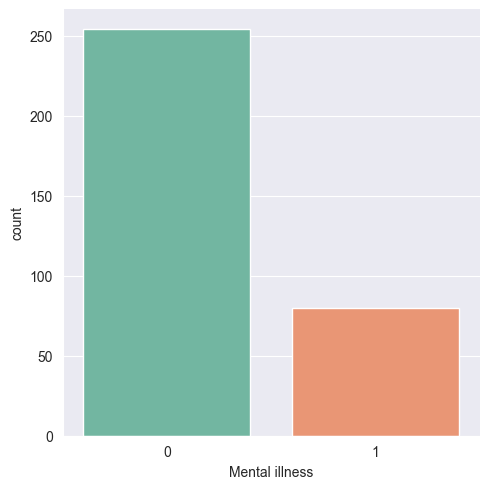

In [30]:
# Countplot
sns.catplot(data=df, x='Mental illness', kind='count',palette = "Set2");

In [31]:
sns.countplot(data=df, x='Mental illness');

In [32]:
sns.catplot(data=df, x="Gender", kind="count", palette = "Set2");

In [33]:
sns.catplot(data=df, x="Lack of concentration", kind="count",palette = "Set2");

In [34]:
sns.catplot(data=df, x="I read outside of work and school", kind="count",palette = "Set2");

In [35]:
sns.catplot(data=df, x="Employed", kind="count",palette = "Set2");

In [36]:
sns.catplot(data=df, x="Household Income", kind="count",palette = "Set2");

In [37]:
sns.catplot(data=df, x="I live with my parents", kind="count",palette = "Set2");

In [38]:
sns.catplot(data=df, x="How many times were you hospitalized for your mental illness", kind="count");

In [39]:
sns.catplot(data=df, x="Anxiety", y="Depression", hue="Gender", kind="bar",palette = "Set2")

#### Covariance Matrix

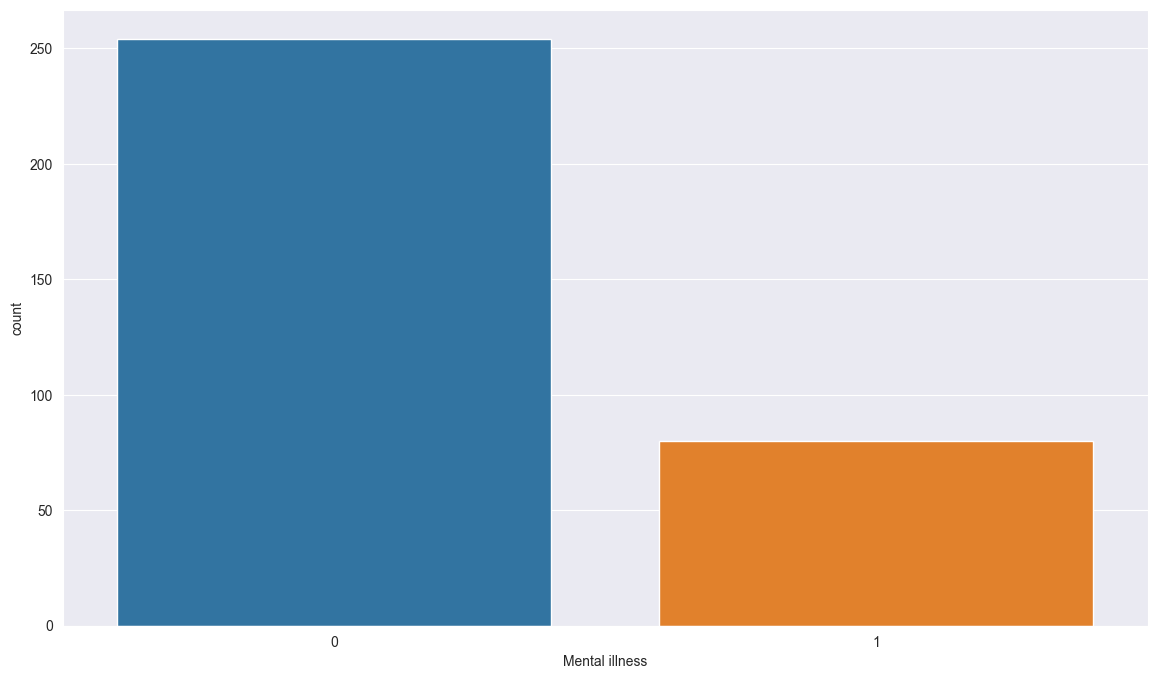

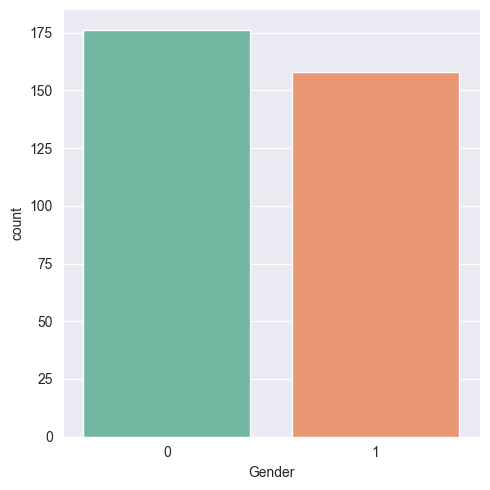

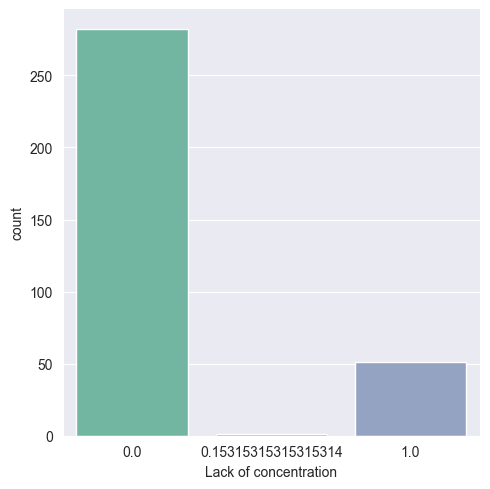

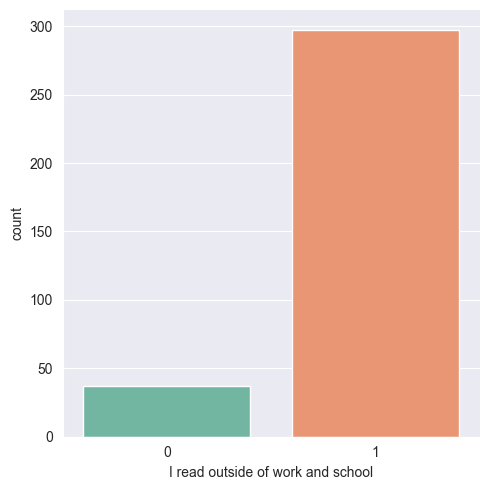

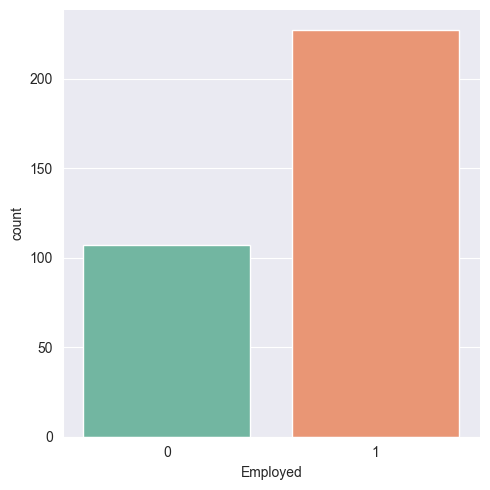

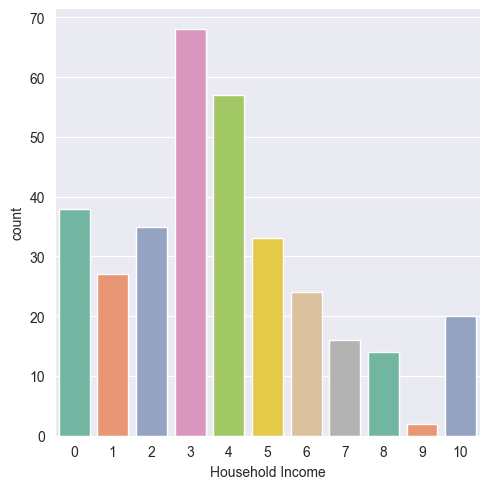

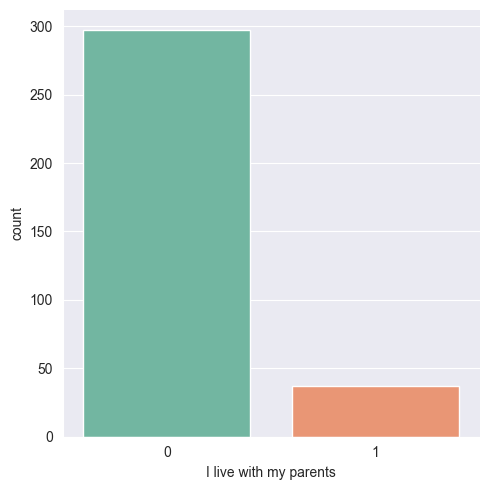

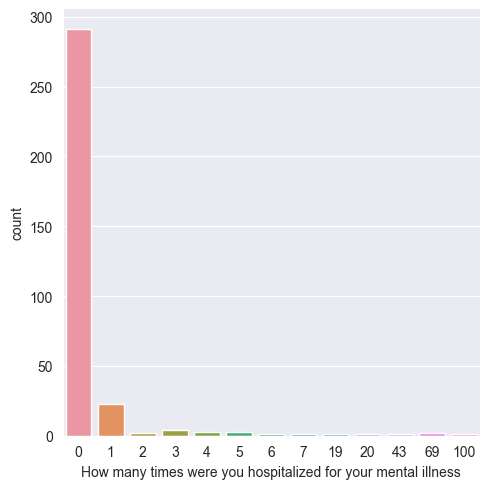

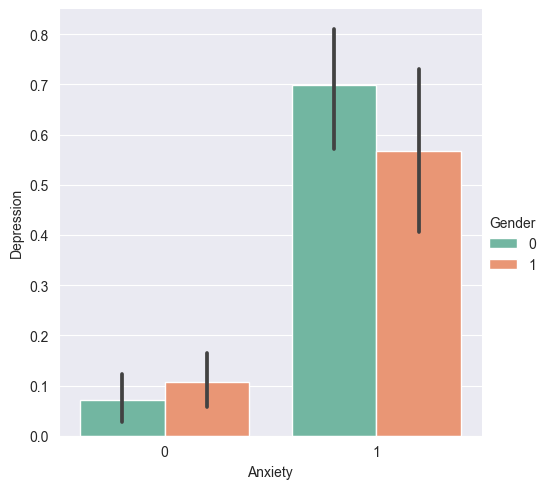

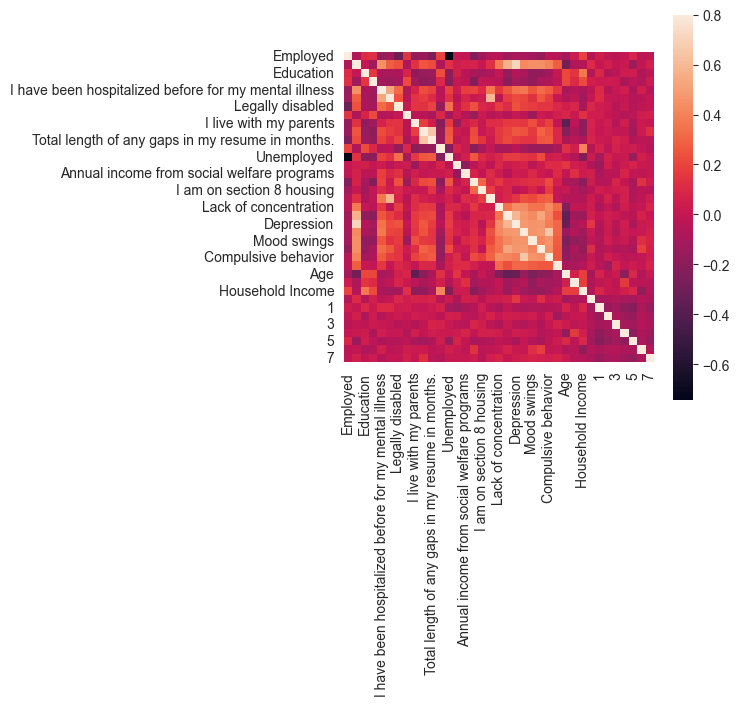

In [40]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

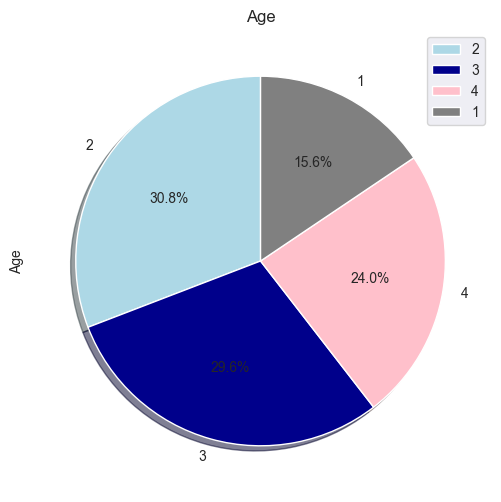

In [41]:
color = ['lightblue', 'darkblue', 'pink', 'grey']
df['Age'].value_counts().plot(kind='pie',
                                        colors = color,
                                        figsize=(8,6),
                                        autopct='%1.1f%%',
                                        shadow = True,
                                        startangle=90)
plt.title("Age")
plt.legend()
plt.show()

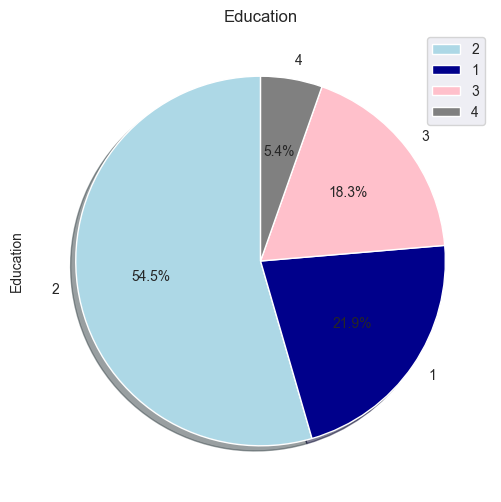

In [42]:
color = ['lightblue', 'darkblue', 'pink', 'grey']
df['Education'].value_counts().plot(kind='pie',
                                        colors = color,
                                        figsize=(8,6),
                                        autopct='%1.1f%%',
                                        shadow = True,
                                        startangle=90)
plt.title("Education")
plt.legend()
plt.show()

In [43]:
#df.to_csv('cleaned_Dataset.csv',index=None)